In [1]:
import NX5352
import pickle
import os
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt

p = NX5352.NX5352()

In [2]:
d_u, d_u_count = p.get_domains_per_user()
deg_users = Counter(d_u_count.values())
deg_users_k, deg_users_v = deg_users.keys(), deg_users.values()

<BarContainer object of 26 artists>

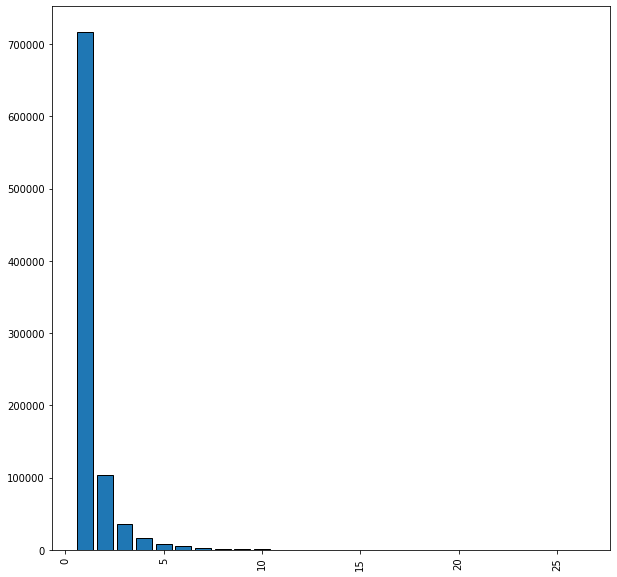

In [22]:
plt.figure(figsize = (10, 10))
plt.xticks(rotation="vertical")
plt.bar(deg_users_k, height=deg_users_v, edgecolor="black")

In [3]:
u_d = p.get_users_per_domain()
k, v = list(u_d.keys()), list(u_d.values())

<BarContainer object of 26 artists>

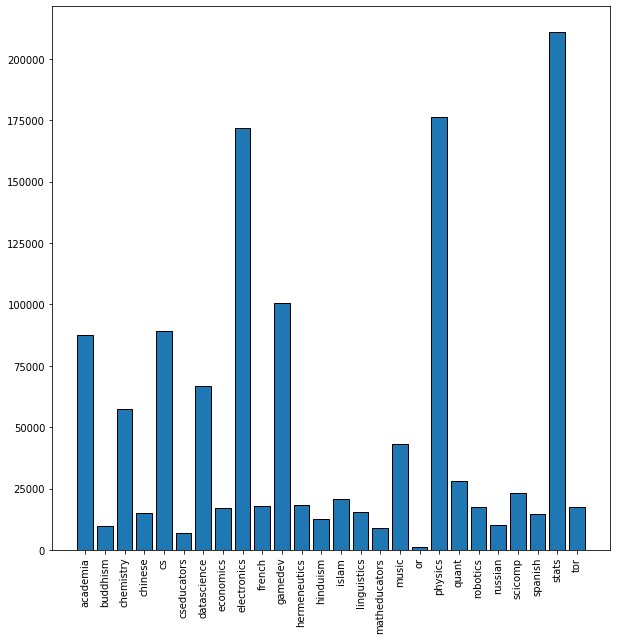

In [24]:
plt.figure(figsize = (10, 10))
plt.xticks(rotation="vertical")
plt.bar(k, height=v, edgecolor="black")

In [4]:
u_map = p.get_user_map()
elist, nlist = p.get_user_domain_participation_edgelist(u_map, d_u_count)

academia
buddhism
chemistry
chinese
cs
cseducators
datascience
economics
electronics
french
gamedev
hermeneutics
hinduism
islam
linguistics
matheducators
music
or
physics
quant
robotics
russian
scicomp
spanish
stats
tor


In [5]:
G = nx.Graph()
G.add_weighted_edges_from(elist)
nx.write_gml(G, "demograph.gml")

In [ ]:
pos = nx.spring_layout(G)

In [ ]:
plt.figure(figsize = (10, 10))
nx.draw_networkx_nodes(G, pos = pos, nodelist = nlist[0], node_color = "r")
nx.draw_networkx_nodes(G, pos = pos, nodelist = nlist[1], node_color = "c", node_size = 10)
nx.draw_networkx_edges(G, pos = pos)
nx.draw_networkx_labels(G, pos = pos, labels = {i: i for i in nlist[0]})

In [11]:
nlist[0]

['academia',
 'buddhism',
 'chemistry',
 'chinese',
 'cs',
 'cseducators',
 'datascience',
 'economics',
 'electronics',
 'french',
 'gamedev',
 'hermeneutics',
 'hinduism',
 'islam',
 'linguistics',
 'matheducators',
 'music',
 'or',
 'physics',
 'quant',
 'robotics',
 'russian',
 'scicomp',
 'spanish',
 'stats',
 'tor']

In [10]:
import pickle
with open("edgelist.pkl", "wb") as fp:
    pickle.dump(elist, fp)